# Homework 1 of the CS452 course at Ozyegin University

**Author:**                  Tuna Tuncer

**Homework is prepared by:** Furkan Kınlı

**Instructor:**              Assistant Prof. Reyhan Aydoğan

## Loading the data

In [1]:
# I will be using the following libraries to load the data, handle the dataframe, visualize, split the data, 
# scale the data, run the linear regression model and calculate the scores of the model.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# Loading the csv data into a dataframe
df = pd.read_csv("assignment-1-data.csv")

## Getting more insight about the data

In [3]:
# Let's see the first 5 entries of the data.
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [4]:
# Getting the general information about columns.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Getting count of rows and columns
df.shape

(2938, 22)

In [6]:
# Checking all the columns if there are any null valued cells.
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [7]:
# Getting some statistical data about the features.
df.describe().round(1)

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.0,2928.0,2928.0,2938.0,2744.0,2938.0,2385.0,2938.0,2904.0,2938.0,2919.0,2712.0,2919.0,2938.0,2490.0,2.286000e+03,2904.0,2904.0,2771.0,2775.0
mean,2007.5,69.2,164.8,30.3,4.6,738.3,80.9,2419.6,38.3,42.0,82.6,5.9,82.3,1.7,7483.2,1.275338e+07,4.8,4.9,0.6,12.0
std,4.6,9.5,124.3,117.9,4.1,1987.9,25.1,11467.3,20.0,160.4,23.4,2.5,23.7,5.1,14270.2,6.101210e+07,4.4,4.5,0.2,3.4
min,2000.0,36.3,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,0.4,2.0,0.1,1.7,3.400000e+01,0.1,0.1,0.0,0.0
25%,2004.0,63.1,74.0,0.0,0.9,4.7,77.0,0.0,19.3,0.0,78.0,4.3,78.0,0.1,463.9,1.957932e+05,1.6,1.5,0.5,10.1
50%,2008.0,72.1,144.0,3.0,3.8,64.9,92.0,17.0,43.5,4.0,93.0,5.8,93.0,0.1,1766.9,1.386542e+06,3.3,3.3,0.7,12.3
75%,2012.0,75.7,228.0,22.0,7.7,441.5,97.0,360.2,56.2,28.0,97.0,7.5,97.0,0.8,5910.8,7.420359e+06,7.2,7.2,0.8,14.3
max,2015.0,89.0,723.0,1800.0,17.9,19479.9,99.0,212183.0,87.3,2500.0,99.0,17.6,99.0,50.6,119172.7,1.293859e+09,27.7,28.6,0.9,20.7


In [8]:
# Getting the pearson correlation between all of the features.
df.corr(method="pearson")

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


### I want to plot the bar correlation graph of the all variables with life expectancy

In [9]:
# Getting the row that only have the correlation values of life expectancy with other variables.
life_exp_corr = df.corr(method="pearson").iloc[:, 1]
life_exp_corr

Year                               0.170033
Life expectancy                    1.000000
Adult Mortality                   -0.696359
infant deaths                     -0.196557
Alcohol                            0.404877
percentage expenditure             0.381864
Hepatitis B                        0.256762
Measles                           -0.157586
 BMI                               0.567694
under-five deaths                 -0.222529
Polio                              0.465556
Total expenditure                  0.218086
Diphtheria                         0.479495
 HIV/AIDS                         -0.556556
GDP                                0.461455
Population                        -0.021538
 thinness  1-19 years             -0.477183
 thinness 5-9 years               -0.471584
Income composition of resources    0.724776
Schooling                          0.751975
Name: Life expectancy , dtype: float64

In [10]:
# Getting all the values but the correlation of life expectancy with itself.
values = np.array(life_exp_corr[life_exp_corr!=1])
values

array([ 0.17003302, -0.69635931, -0.19655718,  0.40487676,  0.3818635 ,
        0.25676195, -0.1575858 ,  0.56769355, -0.22252912,  0.46555581,
        0.21808637,  0.47949486, -0.55655625,  0.46145519, -0.02153811,
       -0.47718319, -0.4715836 ,  0.72477598,  0.75197546])

In [11]:
# Getting all index names and deleting the "Life expectancy"
cols = life_exp_corr.index
cols = cols.delete(1)
cols

Index(['Year', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling'],
      dtype='object')

In [12]:
# Defining a method to return a color depending on the value of the correlation
def get_color(value, base_value):
    return ("red" if (value < base_value) and (value > -base_value) else "green")

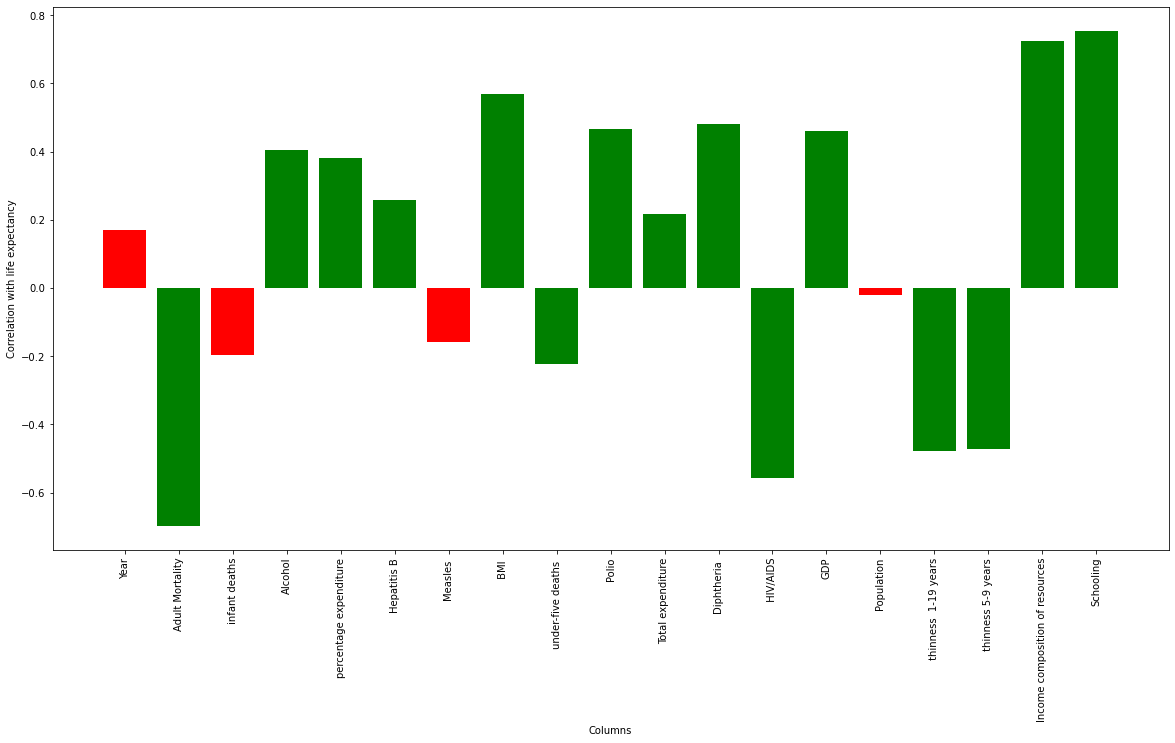

In [13]:
# Plotting the bar correlation graph of the all variables with life expectancy
plt.figure(figsize=(20,10))
plt.xlabel("Columns")
plt.ylabel("Correlation with life expectancy")
plt.xticks(rotation=90)
plt.bar(cols, values, color=[get_color(value, 0.2) for value in values])
plt.show()

<ipython-input-14-5974fb0fc19b>:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  df.hist(ax = ax)


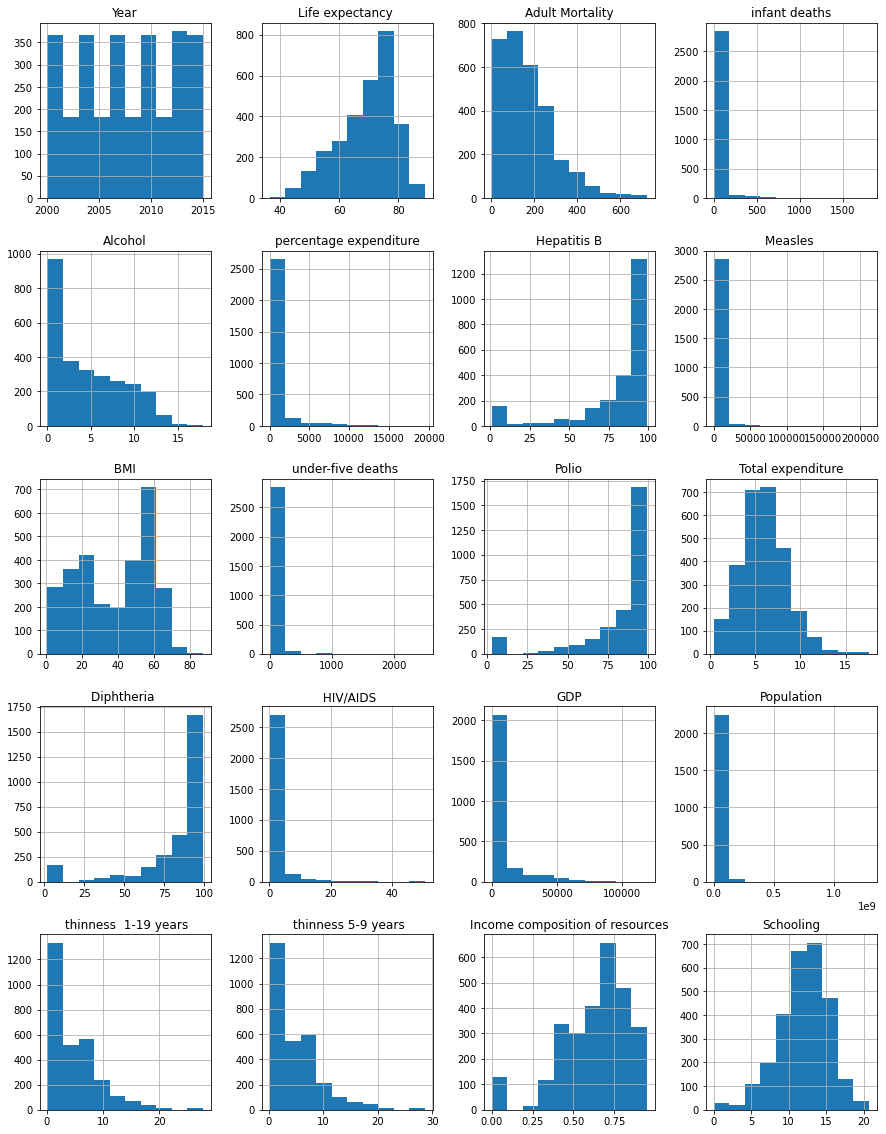

In [14]:
# Drawing a histogram for each of the features
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

## Data Preprocessing

### -> Dropping

In [15]:
# Let's remove the duplicated columns (if there are any) just in case.
df.drop_duplicates(inplace=True)

df.shape

(2938, 22)

In [16]:
# Removing some of the columns from the dataframe.
df.drop(['Country', 'Year', 'infant deaths', 'Measles ', 'Population'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life expectancy                  2928 non-null   float64
 2   Adult Mortality                  2928 non-null   float64
 3   Alcohol                          2744 non-null   float64
 4   percentage expenditure           2938 non-null   float64
 5   Hepatitis B                      2385 non-null   float64
 6    BMI                             2904 non-null   float64
 7   under-five deaths                2938 non-null   int64  
 8   Polio                            2919 non-null   float64
 9   Total expenditure                2712 non-null   float64
 10  Diphtheria                       2919 non-null   float64
 11   HIV/AIDS                        2938 non-null   float64
 12  GDP                 

In [17]:
# Removing the null valued life expectancy rows.
df = df[df['Life expectancy '].notna()]

In [18]:
# Checking if the number of rows are decreased by 10.
df.shape

(2928, 17)

### -> Imputation

In [19]:
# Checking all the columns if there are any null valued cells.
df.isnull().sum().sort_values(ascending=False)

Hepatitis B                        553
GDP                                443
Total expenditure                  226
Alcohol                            193
Schooling                          160
Income composition of resources    160
 thinness 5-9 years                 32
 BMI                                32
 thinness  1-19 years               32
Diphtheria                          19
Polio                               19
 HIV/AIDS                            0
Life expectancy                      0
under-five deaths                    0
percentage expenditure               0
Adult Mortality                      0
Status                               0
dtype: int64

In [20]:
# Filling all of the null cell's with the mean of the corresponding feature.
df['Alcohol'].fillna(df['Alcohol'].mean(), inplace=True)
df['Hepatitis B'].fillna(df['Hepatitis B'].mean(), inplace=True)
df[' BMI '].fillna(df[' BMI '].mean(), inplace=True)
df['Polio'].fillna(df['Polio'].mean(), inplace=True)
df['Total expenditure'].fillna(df['Total expenditure'].mean(), inplace=True)
df['Diphtheria '].fillna(df['Diphtheria '].mean(), inplace=True)
df['GDP'].fillna(df['GDP'].mean(), inplace=True)
df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].mean(), inplace=True)
df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].mean(), inplace=True)
df['Income composition of resources'].fillna(df['Income composition of resources'].mean(), inplace=True)
df['Schooling'].fillna(df['Schooling'].mean(), inplace=True)

df.isnull().sum()

Status                             0
Life expectancy                    0
Adult Mortality                    0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

### -> One-Hot Encoding

In [21]:
# Changing the type of the Status to "category" in order to prepare it to be one-hot encoded.
df["Status"] = df["Status"].astype("category")

In [22]:
# Checking if changing type as category is reflected.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   Status                           2928 non-null   category
 1   Life expectancy                  2928 non-null   float64 
 2   Adult Mortality                  2928 non-null   float64 
 3   Alcohol                          2928 non-null   float64 
 4   percentage expenditure           2928 non-null   float64 
 5   Hepatitis B                      2928 non-null   float64 
 6    BMI                             2928 non-null   float64 
 7   under-five deaths                2928 non-null   int64   
 8   Polio                            2928 non-null   float64 
 9   Total expenditure                2928 non-null   float64 
 10  Diphtheria                       2928 non-null   float64 
 11   HIV/AIDS                        2928 non-null   float64 
 12  GDP   

In [23]:
# One-hot encoding the status feature (since it's the only categorical feature left).
df = pd.get_dummies(df)
df.head()

,Life expectancy,Adult Mortality,Alcohol,percentage expenditure,Hepatitis B,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,65.0,263.0,0.01,71.279624,65.0,19.1,83,6.0,8.16,65.0,0.1,584.259210,17.2,17.3,0.479,10.1,0,1
1,59.9,271.0,0.01,73.523582,62.0,18.6,86,58.0,8.18,62.0,0.1,612.696514,17.5,17.5,0.476,10.0,0,1
2,59.9,268.0,0.01,73.219243,64.0,18.1,89,62.0,8.13,64.0,0.1,631.744976,17.7,17.7,0.470,9.9,0,1
3,59.5,272.0,0.01,78.184215,67.0,17.6,93,67.0,8.52,67.0,0.1,669.959000,17.9,18.0,0.463,9.8,0,1
4,59.2,275.0,0.01,7.097109,68.0,17.2,97,68.0,7.87,68.0,0.1,63.537231,18.2,18.2,0.454,9.5,0,1


In [24]:
# Checking if numerical status columns are created.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2928 entries, 0 to 2937
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Life expectancy                  2928 non-null   float64
 1   Adult Mortality                  2928 non-null   float64
 2   Alcohol                          2928 non-null   float64
 3   percentage expenditure           2928 non-null   float64
 4   Hepatitis B                      2928 non-null   float64
 5    BMI                             2928 non-null   float64
 6   under-five deaths                2928 non-null   int64  
 7   Polio                            2928 non-null   float64
 8   Total expenditure                2928 non-null   float64
 9   Diphtheria                       2928 non-null   float64
 10   HIV/AIDS                        2928 non-null   float64
 11  GDP                              2928 non-null   float64
 12   thinness  1-19 year

## Visualizing and Getting More Insight About the Data After Preprocessing

In [25]:
# Checking the correlation of every feature with the life expectancy after the data preprocessing.
df.corr(method="pearson").iloc[:, 0].sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.718614
Income composition of resources    0.692621
 BMI                               0.562453
Status_Developed                   0.482136
Diphtheria                         0.476442
Polio                              0.462592
GDP                                0.430551
Alcohol                            0.392420
percentage expenditure             0.381864
Total expenditure                  0.209628
Hepatitis B                        0.204566
under-five deaths                 -0.222529
 thinness 5-9 years               -0.467231
 thinness  1-19 years             -0.472778
Status_Developing                 -0.482136
 HIV/AIDS                         -0.556556
Adult Mortality                   -0.696359
Name: Life expectancy , dtype: float64

In [26]:
# Taking the absolute value so that it is easier to see the features that has the lowest correlation values.
df.corr(method="pearson").iloc[:, 0].abs().sort_values(ascending=False)

Life expectancy                    1.000000
Schooling                          0.718614
Adult Mortality                    0.696359
Income composition of resources    0.692621
 BMI                               0.562453
 HIV/AIDS                          0.556556
Status_Developing                  0.482136
Status_Developed                   0.482136
Diphtheria                         0.476442
 thinness  1-19 years              0.472778
 thinness 5-9 years                0.467231
Polio                              0.462592
GDP                                0.430551
Alcohol                            0.392420
percentage expenditure             0.381864
under-five deaths                  0.222529
Total expenditure                  0.209628
Hepatitis B                        0.204566
Name: Life expectancy , dtype: float64

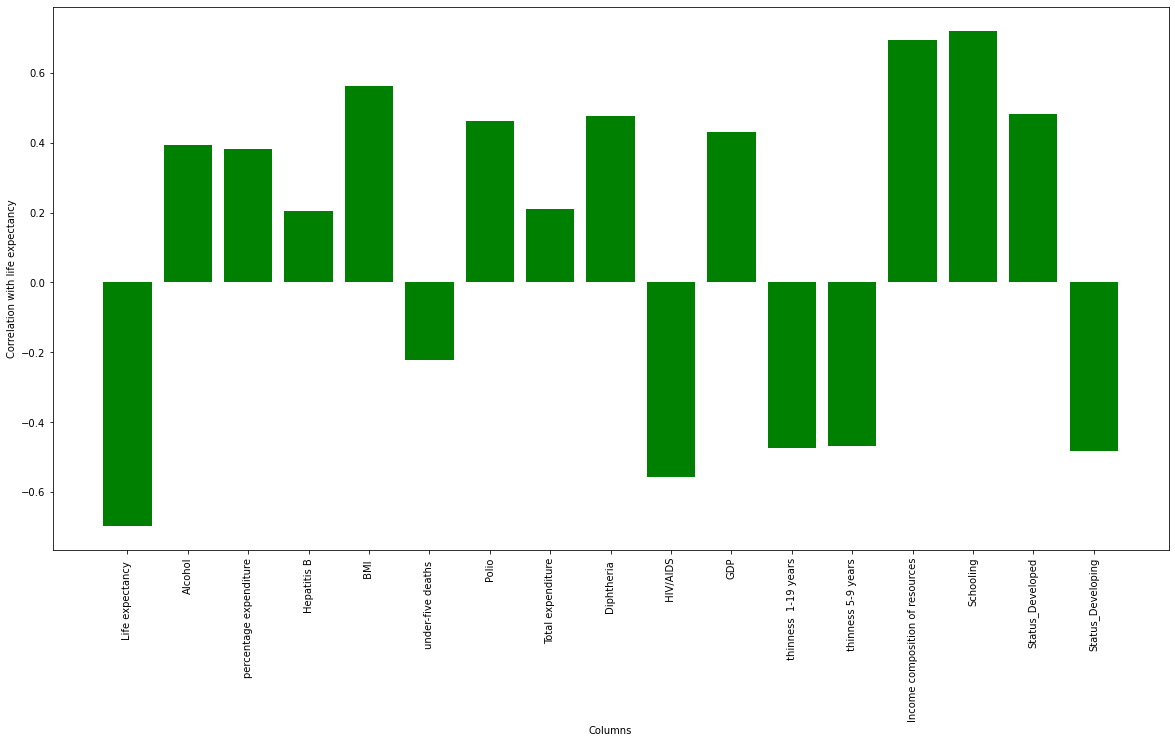

In [27]:
# Plotting the bar correlation graph of the all variables with life expectancy again
life_exp_corr_proc = df.corr(method="pearson").iloc[:, 0]
values_proc = np.array(life_exp_corr_proc[life_exp_corr_proc!=1])
cols_proc = life_exp_corr_proc.index
cols_proc = cols_proc.delete(1)
plt.figure(figsize=(20,10))
plt.xlabel("Columns")
plt.ylabel("Correlation with life expectancy")
plt.xticks(rotation=90)
plt.bar(cols_proc, values_proc, color=[get_color(value, 0.2) for value in values_proc])
plt.show()

## Creating Different Datasets for the Models

In [28]:
# Creating 5 different dataframes.
df_1 = df[df.corr(method="pearson").iloc[:, 0].abs()[df.corr(method="pearson").iloc[:, 0].abs() > 0.2].index] # |corr| > 0.2
df_2 = df[df.corr(method="pearson").iloc[:, 0].abs()[df.corr(method="pearson").iloc[:, 0].abs() > 0.21].index] # |corr| > 0.21 (not including "Hepatitis B" and "Total expenditure")
df_3 = df[df.corr(method="pearson").iloc[:, 0].abs()[df.corr(method="pearson").iloc[:, 0].abs() > 0.4].index] # |corr| > 0.4
df_4 = df[df.corr(method="pearson").iloc[:, 0].abs()[df.corr(method="pearson").iloc[:, 0].abs() > 0.45].index] # |corr| > 0.45 (not including "GDP")
df_5 = df.loc[:, ~df.columns.isin(['Hepatitis B', 'GDP'])] # (not including "Hepatitis B" and "GDP" because they have the most number of NaN values)

for index, data_frame in enumerate([df_1, df_2, df_3, df_4, df_5]):
    print("Shape of df_{}: {}\n".format(index+1, data_frame.shape))

Shape of df_1: (2928, 18)

Shape of df_2: (2928, 16)

Shape of df_3: (2928, 13)

Shape of df_4: (2928, 12)

Shape of df_5: (2928, 16)



## Splitting the Data Frames and Scaling the Features 

In [29]:
# Splitting x and y part of the dataframes.
x_1 = df_1.iloc[:, 1:].values
y_1 = df_1.iloc[:, 0].values
print("Shape of x_1:", x_1.shape)
print("Shape of y_1:", y_1.shape, "\n")

x_2 = df_2.iloc[:, 1:].values
y_2 = df_2.iloc[:, 0].values
print("Shape of x_2:", x_2.shape)
print("Shape of y_2:", y_2.shape, "\n")

x_3 = df_3.iloc[:, 1:].values
y_3 = df_3.iloc[:, 0].values
print("Shape of x_3:", x_3.shape)
print("Shape of y_3:", y_3.shape, "\n")

x_4 = df_4.iloc[:, 1:].values
y_4 = df_4.iloc[:, 0].values
print("Shape of x_4:", x_4.shape)
print("Shape of y_4:", y_4.shape, "\n")

x_5 = df_5.iloc[:, 1:].values
y_5 = df_5.iloc[:, 0].values
print("Shape of x_5:", x_5.shape)
print("Shape of y_5:", y_5.shape, "\n")

Shape of x_1: (2928, 17)
Shape of y_1: (2928,) 

Shape of x_2: (2928, 15)
Shape of y_2: (2928,) 

Shape of x_3: (2928, 12)
Shape of y_3: (2928,) 

Shape of x_4: (2928, 11)
Shape of y_4: (2928,) 

Shape of x_5: (2928, 15)
Shape of y_5: (2928,) 



In [30]:
# Splitting the dataframes into two parts as test and train.
x_1_train, x_1_test, y_1_train, y_1_test = train_test_split(x_1, y_1, test_size=0.2, random_state=147)
x_2_train, x_2_test, y_2_train, y_2_test = train_test_split(x_2, y_2, test_size=0.2, random_state=147)
x_3_train, x_3_test, y_3_train, y_3_test = train_test_split(x_3, y_3, test_size=0.2, random_state=147)
x_4_train, x_4_test, y_4_train, y_4_test = train_test_split(x_4, y_4, test_size=0.2, random_state=147)
x_5_train, x_5_test, y_5_train, y_5_test = train_test_split(x_5, y_5, test_size=0.2, random_state=147)

In [31]:
# Creating 5 different MinMax scalers for scaling the x data between 0 and 1 for each model.
scaler_1=MinMaxScaler(feature_range=(0,1))
scaler_2=MinMaxScaler(feature_range=(0,1))
scaler_3=MinMaxScaler(feature_range=(0,1))
scaler_4=MinMaxScaler(feature_range=(0,1))
scaler_5=MinMaxScaler(feature_range=(0,1))

In [32]:
# Scaling the values of all of the independent variables between the range 0 and 1.
scaled_x_1_train=scaler_1.fit_transform(x_1_train)
scaled_x_2_train=scaler_2.fit_transform(x_2_train)
scaled_x_3_train=scaler_3.fit_transform(x_3_train)
scaled_x_4_train=scaler_4.fit_transform(x_4_train)
scaled_x_5_train=scaler_5.fit_transform(x_5_train)

## Creating and Fitting the Linear Regression Models

In [33]:
# Creating the instance of linear regression model for all of the data frames.
model_1=LinearRegression()
model_2=LinearRegression()
model_3=LinearRegression()
model_4=LinearRegression()
model_5=LinearRegression()

In [34]:
# Fitting every model.
model_1.fit(scaled_x_1_train,y_1_train)
model_2.fit(scaled_x_2_train,y_2_train)
model_3.fit(scaled_x_3_train,y_3_train)
model_4.fit(scaled_x_4_train,y_4_train)
model_5.fit(scaled_x_5_train,y_5_train)

LinearRegression()

## Printing the Various Characteristic of the Models

In [35]:
# Printing the coefficients of all models.
for index,model in enumerate([model_1, model_2, model_3, model_4, model_5]):
    print("Coefficients of model_{}:".format(index+1), model.coef_, "\n")

Coefficients of model_1: [-14.43965023   0.32124116   0.84762355  -1.54431153   3.12343059
  -3.91281474   3.44179292   1.04973487   4.41880613 -24.97538099
   4.09143231  -2.45697097   0.85672026   6.50378458  14.42097973
   0.80339584  -0.80339584] 

Coefficients of model_2: [-14.44048318   0.41578558   1.70139341   3.20548819  -3.33535762
   3.25263069   3.85622639 -24.78949095   3.44926985  -2.49428133
   0.70574174   6.43823657  14.58711342   0.82106053  -0.82106053] 

Coefficients of model_3: [-14.37768218   3.16182068   3.29238668   3.93770394 -24.57524334
   4.88153504  -2.95157151   0.27254827   6.30968828  14.82341348
   0.86592183  -0.86592183] 

Coefficients of model_4: [-1.45561755e+01  3.15034579e+00  3.34529844e+00  3.86746924e+00
 -2.45054829e+01 -2.77854773e+00 -5.63099507e-03  6.86092986e+00
  1.51164303e+01  1.08609951e+00 -1.08609951e+00] 

Coefficients of model_5: [-14.44263218   0.27857583   4.79578143   3.19267185  -3.38234
   3.29307396   0.87421118   3.81688574

In [36]:
# Printing the intercept values of all models.
for index,model in enumerate([model_1, model_2, model_3, model_4, model_5]):
    print("Intercept of model_{}:".format(index+1), model.intercept_, "\n")

Intercept of model_1: 53.99157986302422 

Intercept of model_2: 53.604770530607006 

Intercept of model_3: 53.659372676315 

Intercept of model_4: 53.65454891622315 

Intercept of model_5: 53.31136608513667 



In [37]:
# Printing the equations of all models.
for index,model in enumerate([model_1, model_2, model_3, model_4, model_5]):
    print("Equation of model_{}:".format(index+1))
    _str="y="
    for i,m in enumerate(model.coef_):
        _str+= "(x^{}*{})+".format(i, m)
    _str+=str(model.intercept_)
    print(_str, "\n")

Equation of model_1:
y=(x^0*-14.439650233424524)+(x^1*0.3212411600987481)+(x^2*0.8476235457724058)+(x^3*-1.544311529800617)+(x^4*3.123430591398684)+(x^5*-3.912814744431224)+(x^6*3.441792920227421)+(x^7*1.0497348724097972)+(x^8*4.418806127133217)+(x^9*-24.975380993324396)+(x^10*4.091432313112289)+(x^11*-2.4569709723001036)+(x^12*0.8567202643153158)+(x^13*6.503784583835126)+(x^14*14.420979733247245)+(x^15*0.8033958397724363)+(x^16*-0.8033958397724337)+53.99157986302422 

Equation of model_2:
y=(x^0*-14.44048318406197)+(x^1*0.4157855817769023)+(x^2*1.701393408071506)+(x^3*3.205488194164046)+(x^4*-3.335357617909466)+(x^5*3.252630687644589)+(x^6*3.856226386433968)+(x^7*-24.78949094565128)+(x^8*3.449269846360505)+(x^9*-2.494281326173818)+(x^10*0.7057417409606325)+(x^11*6.438236571279405)+(x^12*14.587113417704817)+(x^13*0.8210605310337259)+(x^14*-0.8210605310337321)+53.604770530607006 

Equation of model_3:
y=(x^0*-14.37768218325415)+(x^1*3.161820679662293)+(x^2*3.2923866778276634)+(x^3*3.937

## Calculating the Score and Error of the Models

In [38]:
# Scaling the test data so that it can be used to predict the target value.
scaled_x_1_test=scaler_1.transform(x_1_test)
scaled_x_2_test=scaler_2.transform(x_2_test)
scaled_x_3_test=scaler_3.transform(x_3_test)
scaled_x_4_test=scaler_4.transform(x_4_test)
scaled_x_5_test=scaler_5.transform(x_5_test)

In [39]:
# Predicting the target values of all models using the correspoding scaled test data.
y_1_predict=model_1.predict(scaled_x_1_test)
y_2_predict=model_2.predict(scaled_x_2_test)
y_3_predict=model_3.predict(scaled_x_3_test)
y_4_predict=model_4.predict(scaled_x_4_test)
y_5_predict=model_5.predict(scaled_x_5_test)

In [40]:
# Measuring the scores of every model.
score_1=model_1.score(scaled_x_1_test,y_1_test)
score_2=model_2.score(scaled_x_2_test,y_2_test)
score_3=model_3.score(scaled_x_3_test,y_3_test)
score_4=model_4.score(scaled_x_4_test,y_4_test)
score_5=model_5.score(scaled_x_5_test,y_5_test)
score_list = [score_1, score_2, score_3, score_4, score_5]

In [41]:
# Printing the scores.
for index, score in enumerate(score_list):
    print("Score of model_{}:".format(index+1), score)

Score of model_1: 0.7932964700970593
Score of model_2: 0.7900682438246094
Score of model_3: 0.7875232097918329
Score of model_4: 0.7854816886392528
Score of model_5: 0.7908910994176532


In [42]:
# Creating the "models" list because it will be used in visualization.
models = ["Model {}".format(index+1) for index in range(5)]
models

['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5']

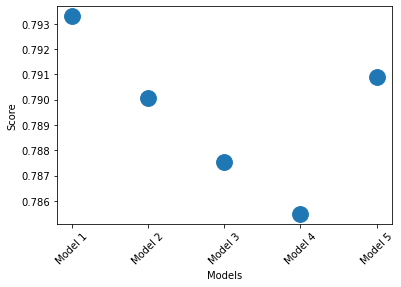

In [43]:
# Plotting the score graph of every model.
plt.xlabel("Models")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.scatter(models, score_list, s=250)
plt.show()

In [44]:
# Calculating the mean squared errors of all models.
mse_1=mean_squared_error(y_1_test,y_1_predict)
mse_2=mean_squared_error(y_2_test,y_2_predict)
mse_3=mean_squared_error(y_3_test,y_3_predict)
mse_4=mean_squared_error(y_4_test,y_4_predict)
mse_5=mean_squared_error(y_5_test,y_5_predict)

mse_list = [mse_1, mse_2, mse_3, mse_4, mse_5]

In [45]:
# Printing the mean squared errors.
for index, mse in enumerate(mse_list):
    print("Mean-squared error of model_{}:".format(index+1), mse)

Mean-squared error of model_1: 17.727351861218473
Mean-squared error of model_2: 18.0042116857518
Mean-squared error of model_3: 18.222479432891824
Mean-squared error of model_4: 18.397564801878506
Mean-squared error of model_5: 17.933641770299904


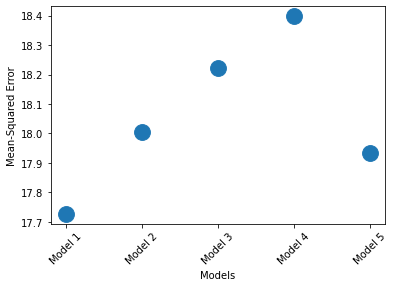

In [46]:
# Plotting the mean-squared error graph of every model.
plt.xlabel("Models")
plt.ylabel("Mean-Squared Error")
plt.xticks(rotation=45)
plt.scatter(models, mse_list, s=250)
plt.show()

In [47]:
# Calculating the mean absolute errors of all models.
mae_1=mean_absolute_error(y_1_test,y_1_predict)
mae_2=mean_absolute_error(y_2_test,y_2_predict)
mae_3=mean_absolute_error(y_3_test,y_3_predict)
mae_4=mean_absolute_error(y_4_test,y_4_predict)
mae_5=mean_absolute_error(y_5_test,y_5_predict)

mae_list = [mae_1, mae_2, mae_3, mae_4, mae_5]

In [48]:
# Printing the mean absolute errors.
for index, mae in enumerate(mae_list):
    print("Mean-absolute error of model_{}:".format(index+1), mae)

Mean-absolute error of model_1: 3.166670258963356
Mean-absolute error of model_2: 3.1669444537277966
Mean-absolute error of model_3: 3.18335778234968
Mean-absolute error of model_4: 3.185355029222679
Mean-absolute error of model_5: 3.160886371658735


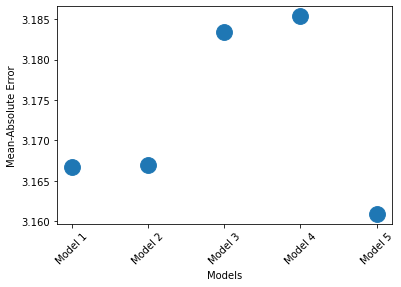

In [49]:
# Plotting the mean-absolute error graph of every model.
plt.xlabel("Models")
plt.ylabel("Mean-Absolute Error")
plt.xticks(rotation=45)
plt.scatter(models, mae_list, s=250)
plt.show()

In [50]:
# Calculating the r2 score of all models.
r2_1=r2_score(y_1_test,y_1_predict)
r2_2=r2_score(y_2_test,y_2_predict)
r2_3=r2_score(y_3_test,y_3_predict)
r2_4=r2_score(y_4_test,y_4_predict)
r2_5=r2_score(y_5_test,y_5_predict)

r2_list = [r2_1, r2_2, r2_3, r2_4, r2_5]

In [51]:
# Printing the r2 scores (which turns out to be the same score we have calculated using "model_1.score(...)")
for index, r2 in enumerate(r2_list):
    print("r2 score of model_{}:".format(index+1), r2)

r2 score of model_1: 0.7932964700970593
r2 score of model_2: 0.7900682438246094
r2 score of model_3: 0.7875232097918329
r2 score of model_4: 0.7854816886392528
r2 score of model_5: 0.7908910994176532


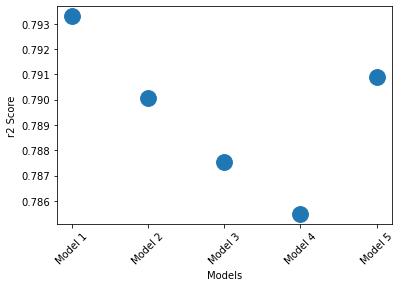

In [52]:
# Plotting the r2 score graph of every model.
plt.xlabel("Models")
plt.ylabel("r2 Score")
plt.xticks(rotation=45)
plt.scatter(models, r2_list, s=250)
plt.show()